## Lets Load and Inspect the data

In [1]:
import re
from collections import Counter
import pandas asB pd
import seaborn as sns

bads = open('poor_amazon_toy_reviews.txt', 'r', encoding="utf8").readlines()
goods = open('good_amazon_toy_reviews.txt', 'r', encoding="utf8").readlines()

print(goods[:5], bads[:5], sep ='\n\n')

['Excellent!!!\n', '"Great quality wooden track (better than some others we have tried). Perfect match to the various vintages of Thomas track that we already have. There is enough track here to have fun and get creative incorporating your key pieces with track splits, loops and bends."\n', 'my daughter loved it and i liked the price and it came to me rather than shopping with a ton of people around me. Amazon is the Best way to shop!\n', 'Great item. Pictures pop thru and add detail as &#34;painted.&#34;  Pictures dry and it can be repainted.\n', 'I was pleased with the product.\n']

["Do not buy these! They break very fast I spun then for 15 minutes and the end flew off don't waste your money. They are made from cheap plastic and have cracks in them. Buy the poi balls they work a lot better if you only have limited funds.\n", "Showed up not how it's shown . Was someone's old toy. with paint on it.\n", 'You need expansion packs 3-5 if you want access to the player aids for the Faction

## Cleaning Malformed Characters

### Find all Unique non Alpha-numeric or whitespace characters

In [2]:
def find_unique_characters(regex, lines):
    """
    Finds unique characters from a list of strings, almost certainly inefficiently 
    
    """
    #Match anything that is non alpha-numeric or whitespace, creates list of lists of matching characters
    potential_malforms = [re.findall(regex, review) for review in lines]

    #lets whittle down this list of lists to a unqiue list, btw this took me way longer than it needed to
    unique_malforms = set([char for review in potential_malforms for char in review])
    
    print(F"Number of unique potential Malformed Characters: {len(unique_malforms)}, \n\nCandidates: {unique_malforms}")
    return unique_malforms

#### Regex I wrote 

In [3]:
#Lets start by attempting to identify any malformed characters, as well as anything not useful for a word count analysis 
#using some (probably bad) regex i wrote

%time unique_malforms = find_unique_characters(r"[^A-Za-z0-9 ]", goods+bads)

Number of unique potential Malformed Characters: 335, 

Candidates: {'年', '😙', 'サ', '😊', '在', '还', 'ㅑ', 'ラ', '😪', '⚾', '$', '马', '🐘', 'レ', '●', '✌', '的', '运', '回', '，', '►', '💝', '😳', '🐗', '▽', '为', 'メ', '∇', '收', 'シ', '喜', '&', '😱', '}', '“', '本', '^', '方', 'カ', '{', '谢', '😯', '感', '🙌', '☺', '😥', '细', '😶', '͜', '😨', '\u3000', '%', '¯', 'ฅ', '.', ']', '🎪', '😭', '«', '👻', '😕', '就', '—', '。', 'ヽ', '生', '-', '•', '‹', '👧', '买', '👀', '👨', '🏻', '🏼', '›', '💯', '💁', 'ď', '☹', "'", '然', '\u200d', 'Í', '@', '💗', '😰', '≧', 'х', '️', 'É', '♡', '>', 'ン', '๑', '😏', '😜', '原', '是', '我', '!', '/', '⌒', '£', '😗', '–', '中', '设', '(', '当', '\x1b', '🐻', '👍', 'ʖ', '✴', '国', 'ω', '👩', '™', '😮', '👎', '"', '´', '💜', '☆', '💔', 'キ', '니', '💕', '逊', '・', '💛', '😡', '¼', '😟', '😠', '🌴', '⁃', 'ム', '😾', '亚', '’', '💙', '🐞', '💖', '»', '从', '😲', '👌', '按', '👽', '🍂', '¦', '🏽', 'ー', 'é', '🍴', '░', '😞', '🍔', '☀', '🏃', 'Ñ', '`', '😉', '🎃', 'ヾ', '和', '*', '🙂', '😫', '￣', '<', '¿', 'í', '😃', '♪', '\\', '😘', '🐧', '厂', '🙅', 'ó', 'Е

#### Regex I stole

In [4]:
# After writing my own, was curious what stack overflow had to say about it, mostly functionally equivalent
# my regex caught more unique characters and I like my results better, so I will use mine, also mine is faster :) 
# stolen from: stackoverflow.com/questions/3885964/regex-to-replace-invalid-characters

%time stolen_unique_malforms = find_unique_characters(r"[\W ]", goods+bads)

Number of unique potential Malformed Characters: 228, 

Candidates: {'☹', '♪', '😙', '⭐', "'", '😔', '😊', '\u200d', '\\', '💪', '😘', '∀', '🐧', '🙅', '@', '💗', '）', '😎', '😁', '\u200b', '😋', '😰', '≧', '😷', '…', '😪', '️', '°', '⚾', '😴', '😍', '$', '♡', '>', '🏿', '🐘', '😏', '😜', '~', '●', '✌', '#', '📱', '◄', '\n', '😆', '💀', '🐌', '!', '/', '，', '►', '💝', '😳', '😂', '😝', '💘', '”', '🍟', '⌒', '£', '🐷', '😗', '–', '😚', '🐗', '🐬', '(', '😄', '\x1b', '😻', '▽', '🐻', '👍', '😈', '∇', '😐', '🐇', '✋', '⁄', '✴', ',', '👩', '͡', '＿', '™', '&', '😮', '🐣', '💚', '[', '®', '～', '👏', '🍦', '😱', '！', '}', '🐝', '🐜', '“', '👎', '🐶', '☝', '^', '✔', '😤', '😖', '"', '×', '🚗', '´', '💜', '☆', '≦', '≡', '💔', '💕', '・', '{', '💛', '😡', '🎶', '🐮', '😯', '😟', '😅', '🙌', '😠', '🌴', '⁃', '🌵', '😾', '|', '😀', '☺', '😥', '＾', '’', '💙', '͜', '😇', '🐞', '\u3000', '❗', '💖', '😨', '»', '😶', '¡', '%', '👌', '♥', '¯', '😲', '‘', '∩', '🚮', '💓', '👽', ';', '🔫', '😢', '🍂', '¦', '🎉', ':', '❤', '.', '🙏', ']', '🏽', '🎪', '✨', '🐍', '🏾', '«', '👻', '😭', '🍴', ' ', '😕', '

In [5]:
#lets check whats in stolen characters thats not in mine, good mine is a superset except for whitespace, which i wan
combined_malforms = []
for character in stolen_unique_malforms:
            if character not in unique_malforms: 
                combined_malforms.append(character)
print(combined_malforms)

[' ']


### Lets read a couple of reviews that are potential candidates

We can see that most of these matches are just normal use of punctuation, however we can remove all of these since it is irrelevant to our word count analysis anyways, and will remove HTML encoding errors (&#34), as well as emojis, non-english characters(本, è) and other bad characters (🏼, ░).

ASSUMPTION: We are assuming the marketing manager only cares about enlgish reviews because they only manage english speaking regions

In [6]:
#first 5 good reviews
for review in goods[:5]: 
    if set([char in review for char in unique_malforms]):
        print(review)

Excellent!!!

"Great quality wooden track (better than some others we have tried). Perfect match to the various vintages of Thomas track that we already have. There is enough track here to have fun and get creative incorporating your key pieces with track splits, loops and bends."

my daughter loved it and i liked the price and it came to me rather than shopping with a ton of people around me. Amazon is the Best way to shop!

Great item. Pictures pop thru and add detail as &#34;painted.&#34;  Pictures dry and it can be repainted.

I was pleased with the product.



In [7]:
#first 5 bad reviews
for review in bads[:5]: 
    if set([char in review for char in unique_malforms]):
        print(review)

Do not buy these! They break very fast I spun then for 15 minutes and the end flew off don't waste your money. They are made from cheap plastic and have cracks in them. Buy the poi balls they work a lot better if you only have limited funds.

Showed up not how it's shown . Was someone's old toy. with paint on it.

You need expansion packs 3-5 if you want access to the player aids for the Factions expansion. The base game of Alien Frontiers just plays so much smoother than adding Factions with the expansion packs. All this will do is pigeonhole you into a certain path to victory.

"This was to be a gift for my husband for our new pool. Did not receive the color I ordered but most of all after only one month of use (not continuously) the mesh pulled away from the material and the inflatable side. Completely shredded and no longer of use. It was stored properly and was not kept outside or in the pool. Poorly made, better off going to W**-M*** and getting something on clearance."

Received

### Removing all malformed characters

In [8]:
#SANITY CHECK: make sure the list comprehension works like i think it does
trad_loop_bad = []
for review in bads: 
    trad_loop_bad.append(re.sub(r"[^A-Za-z0-9 ]",'',review))
    
#well keep these
bad_cleaned_reviews = [re.sub(r"[^A-Za-z0-9 ]",'',review) for review in bads]
good_cleaned_reviews = [re.sub(r"[^A-Za-z0-9 ]",'',review) for review in goods]

print(F"List comp works?: {trad_loop_bad == bad_cleaned_reviews}")
#get rid of extra garbage
del trad_loop_bad

List comp works?: True


## Analysis

### Occasion Analysis

In [9]:
#make sure to pass ignorecase flag 
def get_words(reviews, reg):
#    good_words = []
    occasions = [] 
    for review in reviews:
        occasions.extend(re.findall(reg, review, flags=re.IGNORECASE))
#        for word in re.findall(r"(\b[^\s]+\b)", review): 
#            good_words.append(word)

    occasions = [occ.lower() for occ in occasions]
    return occasions

In [10]:
#I got tired of nested list comprehensions, lets find number of occurences of words,
#less stop words I noticed that came up frequently, leaving all words in a list in case we want them later
occasions = get_words(good_cleaned_reviews,  r"(Thanksgiving|Christmas|xmas|hanukkah|anniversary|anniversaries\
    |birthdays?|kwanzaa|halloween|easter|valentine|Ramadan)")

occasions_df = pd.DataFrame(data= dict(Counter(occasions)).values(),\
                            index = dict(Counter(occasions)).keys(), columns = ['Good_Mentions'])
occasions_df

,Good_Mentions
birthday,3932
halloween,413
christmas,1201
xmas,98
birthdays,59
easter,96
valentine,23
anniversary,52
hanukkah,2
thanksgiving,11


In [11]:
#I got tired of nested list comprehensions, lets find number of occurences of words,
#less stop words I noticed that came up frequently, leaving all words in a list in case we want them later

occasions_bad = get_words(bad_cleaned_reviews, reg =  r"(Thanksgiving|Christmas|xmas|hanukkah|anniversary|anniversaries\
    |birthdays?|kwanzaa|halloween|easter|valentine|Ramadan)")

occasion_bad_df = pd.DataFrame(data= dict(Counter(occasions_bad)).values(),\
                               index = dict(Counter(occasions_bad)).keys(), columns = ['Bad_Mentions'])
occasions_df = occasions_df.join(occasion_bad_df)

occasions_df

,Good_Mentions,Bad_Mentions
birthday,3932,444.0
halloween,413,21.0
christmas,1201,74.0
xmas,98,2.0
birthdays,59,1.0
easter,96,4.0
valentine,23,NaN
anniversary,52,3.0
hanukkah,2,NaN
thanksgiving,11,NaN


In [12]:
#Normalize mentions by number of reviews
occasions_df['Good_Mentions_pct']= (occasions_df.Good_Mentions / len(good_cleaned_reviews))*100
occasions_df['Bad_Mentions_pct']= (occasions_df.Bad_Mentions / len(bad_cleaned_reviews))*100
occasions_df.sort_values('Bad_Mentions_pct', inplace= True, ascending = False)
occasions_df

,Good_Mentions,Bad_Mentions,Good_Mentions_pct,Bad_Mentions_pct
birthday,3932,444.0,3.846718,3.496063
christmas,1201,74.0,1.174951,0.582677
halloween,413,21.0,0.404042,0.165354
easter,96,4.0,0.093918,0.031496
anniversary,52,3.0,0.050872,0.023622
xmas,98,2.0,0.095874,0.015748
birthdays,59,1.0,0.057720,0.007874
valentine,23,NaN,0.022501,NaN
hanukkah,2,NaN,0.001957,NaN
thanksgiving,11,NaN,0.010761,NaN


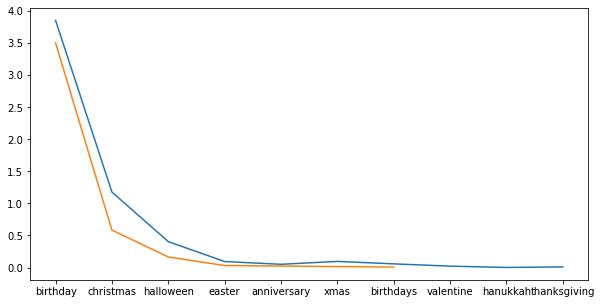

In [13]:
import matplotlib.pyplot as plt
plot_df = occasions_df[['Good_Mentions_pct','Bad_Mentions_pct']]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
f = plt.plot(plot_df)

#orange is negative review %

### Age Analysis 

In [14]:
def process_age_df(ages):
    ages_df = pd.DataFrame(data= dict(Counter(ages)).values(),\
                            index = dict(Counter(ages)).keys(), columns = ['age_mentions'])
    ages_df.reset_index(inplace=True)
    ages_df.rename(columns={'index':'match'},inplace=True)

    ages_df["age_guess"]= ages_df['match'].map({'kids':10, 'kid':10, 'children':10, 'boys':10,'boy':10, 'girls':10, 'girl':10,\
    'grandchildren':10, 'grandkids':10,'grandkid':10, 'baby':3,'babies':3}, na_action = 'ignore')
    ages_df["age_guess_reg"] = ages_df["match"].str.extract(r"([0-9]+)")
    ages_df = ages_df.fillna(0)

    ages_df['final_age_guess'] = ages_df.age_guess.astype(float) + ages_df.age_guess_reg.astype(float)

    #get rid of 99 + ages
    ages_df = ages_df[ages_df['final_age_guess'] < 99]

    ages_df.drop(columns= (['match','age_mentions','age_guess','age_guess_reg']),inplace=True)
    
    return(ages_df)

In [15]:
ages = get_words(good_cleaned_reviews,  r"([0-9]+ years? olds?|kids?|children|boys?|girls?|\
grandchildren|grandkids?|baby|babies|[0-9]+ years?)")

ages_df = process_age_df(ages)

ages_df['review_sentiment'] = 1

In [16]:
ages_bad = get_words(bad_cleaned_reviews,  r"([0-9]+ years? olds?|kids?|children|boys?|girls?|\
grandchildren|grandkids?|baby|babies|[0-9]+ years?)")

ages_bad = process_age_df(ages_bad)

ages_bad['review_sentiment'] = 0

In [17]:
final_age_df = pd.concat([ages_bad,ages_df])
groups = [0, 5, 12, 15, 25, 50, 100]
final_age_df['age_groups'] = pd.cut(final_age_df['final_age_guess'], groups)
final_age_df.groupby('age_groups').agg({'review_sentiment':'mean'})

,review_sentiment
age_groups,
"(0, 5]",0.555556
"(5, 12]",0.558442
"(12, 15]",0.700000
"(15, 25]",0.810811
"(25, 50]",0.838235
"(50, 100]",0.967213


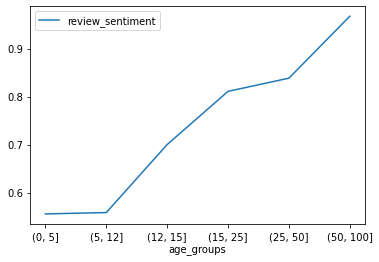

In [18]:
final_age_df.groupby('age_groups').agg({'review_sentiment':'mean'}).plot()

## Results

### Occasions

- It is very clear from the results that Birthdays make up the lions share of positive mentions in the reviews at 3942, or 3.8% of all positive reviews
- Typically negative occasions mention all holidays as a ratio of total reviews, we can infer that those who are buying the goods for occasion are more pleased with it, this may be because of the euphoric nature of the occasion

These top three holidays make up almost 97% of occasion mentions.(Birthdays, Christmas, Halloween)*

Reccomendations: 
- Include in eithier the product name or description the following words to improve search engine optimization: (Birthdays, Christmas, Halloween, holidays, occasions) This will attract more people who purchase it for an occaison who may be more likely to be satisfied. 



### Age Groups

Assumptions: 
- Each of the following categories got put into the respective age group: 'kid':10, 'children':10, 'boys':10 'girls':10 'grandchildren':10'baby':3
- Th

It is very clear that as age increases so does the average sentiment (measured by the percent of positive reviews in a given bucket)

Reccomendations: 
- include older reccomended age to drive older customers
- include keywords that seniors commonly search 


### Limitations of word counts

We are just scratching the surface of the reviews, we are almost certainly missing holidays (there are hundreds), and age groups, furthermore, we make large assumptions about the context of the words, which we know essentially nothing about. The surrounding words could completely change the inferred meaning of the words we are looking for. Ages are particularly hard to guess at using wordcounts, as you saw, we had to make large assumptions. 

Because of this we make large assumptions when we use wordcounts, both about the comprehensiveness and depth of the analysis.

Next steps would include much more thorough EDA of the text to ensure we are grabbing as many relevant words/phrases with the regex as possible, could also includemore advanced NLP such as sentiment analysis to ensure people are not confused and accidentally leaving a negative review, but marking 5 stars and vice versa.